In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 28, 18
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import itertools
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['font.sans-serif'] = ['SimHei']

In [2]:
df = pd.read_csv('MER_T12_06.csv')
df.head(15)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5346 entries, 0 to 5345
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSN           5346 non-null   object
 1   YYYYMM        5346 non-null   int64 
 2   Value         5346 non-null   object
 3   Column_Order  5346 non-null   int64 
 4   Description   5346 non-null   object
 5   Unit          5346 non-null   object
dtypes: int64(2), object(4)
memory usage: 250.7+ KB


In [3]:
df.head()

,MSN,YYYYMM,Value,Column_Order,Description,Unit
0,CLEIEUS,197301,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1,CLEIEUS,197302,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
2,CLEIEUS,197303,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
3,CLEIEUS,197304,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
4,CLEIEUS,197305,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [4]:
dateparse = lambda x: pd.to_datetime(x, format='%Y%m', errors = 'coerce')
df = pd.read_csv("MER_T12_06.csv", parse_dates=['YYYYMM'], index_col='YYYYMM', date_parser=dateparse) 
ts = df[pd.Series(pd.to_datetime(df.index, errors='coerce')).notnull().values]
ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4941 entries, 1973-01-01 to 2018-09-01
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSN           4941 non-null   object
 1   Value         4941 non-null   object
 2   Column_Order  4941 non-null   int64 
 3   Description   4941 non-null   object
 4   Unit          4941 non-null   object
dtypes: int64(1), object(4)
memory usage: 231.6+ KB


In [5]:
ts.head()

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [8]:
ts['Value'] = pd.to_numeric(ts['Value'],errors = 'coerce')
ts.dropna(inplace = True)
ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4557 entries, 1973-01-01 to 2018-09-01
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSN           4557 non-null   object 
 1   Value         4557 non-null   float64
 2   Column_Order  4557 non-null   int64  
 3   Description   4557 non-null   object 
 4   Unit          4557 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 213.6+ KB


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


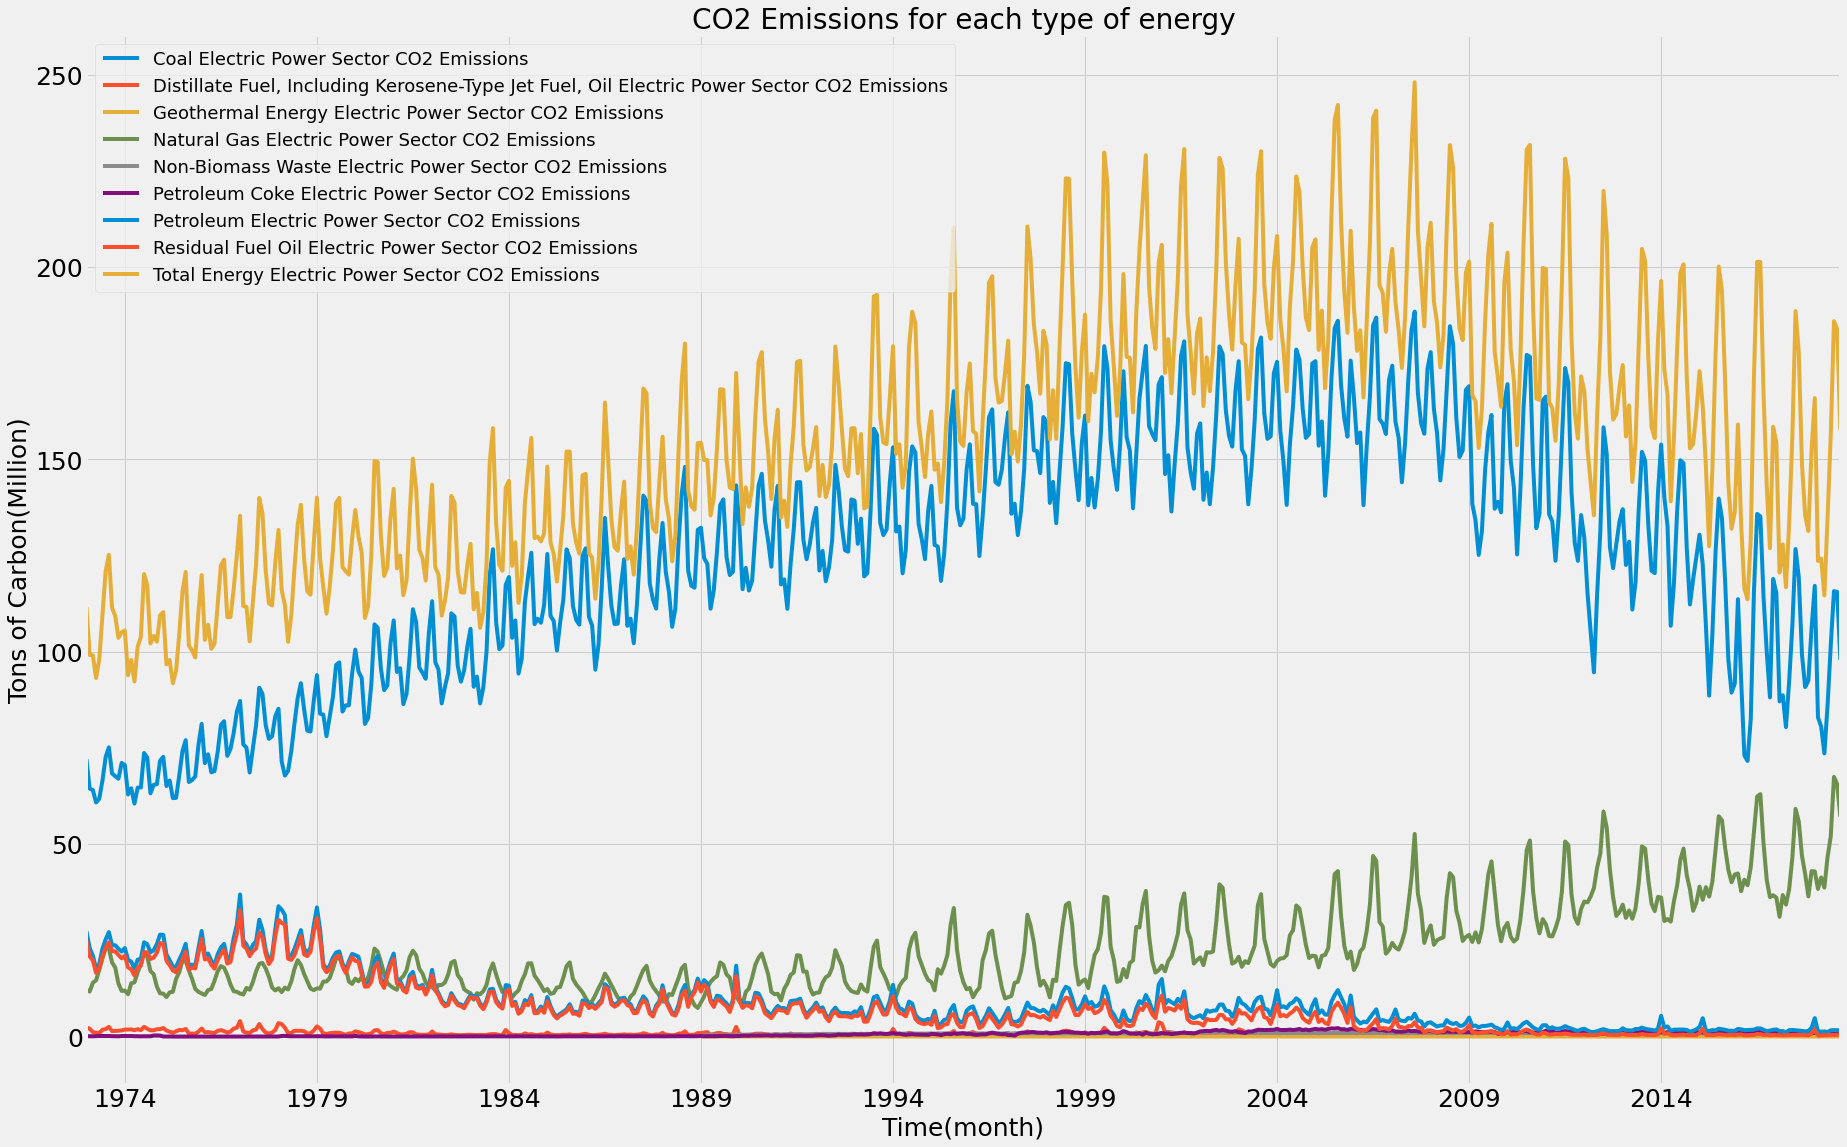

In [9]:
Energy_sources = ts.groupby('Description')
rcParams['figure.figsize'] = 28, 18
fig, ax = plt.subplots()
for desc, group in Energy_sources:
    group.plot(y = 'Value', label = desc, ax = ax, title = 'CO2 Emissions for each type of energy', fontsize = 25)
    ax.set_xlabel('Time(month)')
    ax.set_ylabel('Tons of Carbon(Million)')
    ax.title.set_size(28)
    ax.xaxis.label.set_size(25)
    ax.yaxis.label.set_size(25)
    ax.legend(loc='best', fontsize=18)

In [13]:
for desc, group in Energy_sources:
    display(desc)
    display(group)

'Coal Electric Power Sector CO2 Emissions'

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
...,...,...,...,...,...
2018-05-01,CLEIEUS,86.092,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
2018-06-01,CLEIEUS,101.692,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
2018-07-01,CLEIEUS,115.765,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


'Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions'

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,DKEIEUS,2.375,3,"Distillate Fuel, Including Kerosene-Type Jet F...",Million Metric Tons of Carbon Dioxide
1973-02-01,DKEIEUS,2.061,3,"Distillate Fuel, Including Kerosene-Type Jet F...",Million Metric Tons of Carbon Dioxide
1973-03-01,DKEIEUS,1.171,3,"Distillate Fuel, Including Kerosene-Type Jet F...",Million Metric Tons of Carbon Dioxide
1973-04-01,DKEIEUS,1.022,3,"Distillate Fuel, Including Kerosene-Type Jet F...",Million Metric Tons of Carbon Dioxide
1973-05-01,DKEIEUS,0.949,3,"Distillate Fuel, Including Kerosene-Type Jet F...",Million Metric Tons of Carbon Dioxide
...,...,...,...,...,...
2018-05-01,DKEIEUS,0.345,3,"Distillate Fuel, Including Kerosene-Type Jet F...",Million Metric Tons of Carbon Dioxide
2018-06-01,DKEIEUS,0.334,3,"Distillate Fuel, Including Kerosene-Type Jet F...",Million Metric Tons of Carbon Dioxide
2018-07-01,DKEIEUS,0.279,3,"Distillate Fuel, Including Kerosene-Type Jet F...",Million Metric Tons of Carbon Dioxide


'Geothermal Energy Electric Power Sector CO2 Emissions'

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1989-01-01,GEEIEUS,0.031,7,Geothermal Energy Electric Power Sector CO2 Em...,Million Metric Tons of Carbon Dioxide
1989-02-01,GEEIEUS,0.028,7,Geothermal Energy Electric Power Sector CO2 Em...,Million Metric Tons of Carbon Dioxide
1989-03-01,GEEIEUS,0.031,7,Geothermal Energy Electric Power Sector CO2 Em...,Million Metric Tons of Carbon Dioxide
1989-04-01,GEEIEUS,0.030,7,Geothermal Energy Electric Power Sector CO2 Em...,Million Metric Tons of Carbon Dioxide
1989-05-01,GEEIEUS,0.031,7,Geothermal Energy Electric Power Sector CO2 Em...,Million Metric Tons of Carbon Dioxide
...,...,...,...,...,...
2018-05-01,GEEIEUS,0.035,7,Geothermal Energy Electric Power Sector CO2 Em...,Million Metric Tons of Carbon Dioxide
2018-06-01,GEEIEUS,0.034,7,Geothermal Energy Electric Power Sector CO2 Em...,Million Metric Tons of Carbon Dioxide
2018-07-01,GEEIEUS,0.035,7,Geothermal Energy Electric Power Sector CO2 Em...,Million Metric Tons of Carbon Dioxide


'Natural Gas Electric Power Sector CO2 Emissions'

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,NNEIEUS,12.175,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,NNEIEUS,11.708,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,NNEIEUS,13.994,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,NNEIEUS,14.627,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,NNEIEUS,17.344,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
...,...,...,...,...,...
2018-05-01,NNEIEUS,46.682,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
2018-06-01,NNEIEUS,52.096,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
2018-07-01,NNEIEUS,67.495,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


'Non-Biomass Waste Electric Power Sector CO2 Emissions'

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1989-01-01,NWEIEUS,0.371,8,Non-Biomass Waste Electric Power Sector CO2 Em...,Million Metric Tons of Carbon Dioxide
1989-02-01,NWEIEUS,0.335,8,Non-Biomass Waste Electric Power Sector CO2 Em...,Million Metric Tons of Carbon Dioxide
1989-03-01,NWEIEUS,0.371,8,Non-Biomass Waste Electric Power Sector CO2 Em...,Million Metric Tons of Carbon Dioxide
1989-04-01,NWEIEUS,0.359,8,Non-Biomass Waste Electric Power Sector CO2 Em...,Million Metric Tons of Carbon Dioxide
1989-05-01,NWEIEUS,0.371,8,Non-Biomass Waste Electric Power Sector CO2 Em...,Million Metric Tons of Carbon Dioxide
...,...,...,...,...,...
2018-05-01,NWEIEUS,0.954,8,Non-Biomass Waste Electric Power Sector CO2 Em...,Million Metric Tons of Carbon Dioxide
2018-06-01,NWEIEUS,0.923,8,Non-Biomass Waste Electric Power Sector CO2 Em...,Million Metric Tons of Carbon Dioxide
2018-07-01,NWEIEUS,0.954,8,Non-Biomass Waste Electric Power Sector CO2 Em...,Million Metric Tons of Carbon Dioxide


'Petroleum Coke Electric Power Sector CO2 Emissions'

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,PCEIEUS,0.128,4,Petroleum Coke Electric Power Sector CO2 Emiss...,Million Metric Tons of Carbon Dioxide
1973-02-01,PCEIEUS,0.106,4,Petroleum Coke Electric Power Sector CO2 Emiss...,Million Metric Tons of Carbon Dioxide
1973-03-01,PCEIEUS,0.083,4,Petroleum Coke Electric Power Sector CO2 Emiss...,Million Metric Tons of Carbon Dioxide
1973-04-01,PCEIEUS,0.130,4,Petroleum Coke Electric Power Sector CO2 Emiss...,Million Metric Tons of Carbon Dioxide
1973-05-01,PCEIEUS,0.167,4,Petroleum Coke Electric Power Sector CO2 Emiss...,Million Metric Tons of Carbon Dioxide
...,...,...,...,...,...
2018-05-01,PCEIEUS,0.452,4,Petroleum Coke Electric Power Sector CO2 Emiss...,Million Metric Tons of Carbon Dioxide
2018-06-01,PCEIEUS,0.864,4,Petroleum Coke Electric Power Sector CO2 Emiss...,Million Metric Tons of Carbon Dioxide
2018-07-01,PCEIEUS,0.978,4,Petroleum Coke Electric Power Sector CO2 Emiss...,Million Metric Tons of Carbon Dioxide


'Petroleum Electric Power Sector CO2 Emissions'

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,PAEIEUS,27.369,6,Petroleum Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,PAEIEUS,23.034,6,Petroleum Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,PAEIEUS,21.034,6,Petroleum Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,PAEIEUS,17.714,6,Petroleum Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,PAEIEUS,18.870,6,Petroleum Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
...,...,...,...,...,...
2018-05-01,PAEIEUS,1.200,6,Petroleum Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
2018-06-01,PAEIEUS,1.641,6,Petroleum Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
2018-07-01,PAEIEUS,1.685,6,Petroleum Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


'Residual Fuel Oil Electric Power Sector CO2 Emissions'

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,RFEIEUS,24.867,5,Residual Fuel Oil Electric Power Sector CO2 Em...,Million Metric Tons of Carbon Dioxide
1973-02-01,RFEIEUS,20.867,5,Residual Fuel Oil Electric Power Sector CO2 Em...,Million Metric Tons of Carbon Dioxide
1973-03-01,RFEIEUS,19.780,5,Residual Fuel Oil Electric Power Sector CO2 Em...,Million Metric Tons of Carbon Dioxide
1973-04-01,RFEIEUS,16.562,5,Residual Fuel Oil Electric Power Sector CO2 Em...,Million Metric Tons of Carbon Dioxide
1973-05-01,RFEIEUS,17.754,5,Residual Fuel Oil Electric Power Sector CO2 Em...,Million Metric Tons of Carbon Dioxide
...,...,...,...,...,...
2018-05-01,RFEIEUS,0.403,5,Residual Fuel Oil Electric Power Sector CO2 Em...,Million Metric Tons of Carbon Dioxide
2018-06-01,RFEIEUS,0.443,5,Residual Fuel Oil Electric Power Sector CO2 Em...,Million Metric Tons of Carbon Dioxide
2018-07-01,RFEIEUS,0.428,5,Residual Fuel Oil Electric Power Sector CO2 Em...,Million Metric Tons of Carbon Dioxide


'Total Energy Electric Power Sector CO2 Emissions'

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,TXEIEUS,111.621,9,Total Energy Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,TXEIEUS,99.185,9,Total Energy Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,TXEIEUS,99.112,9,Total Energy Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,TXEIEUS,93.183,9,Total Energy Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,TXEIEUS,98.012,9,Total Energy Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
...,...,...,...,...,...
2018-05-01,TXEIEUS,134.963,9,Total Energy Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
2018-06-01,TXEIEUS,156.387,9,Total Energy Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
2018-07-01,TXEIEUS,185.935,9,Total Energy Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


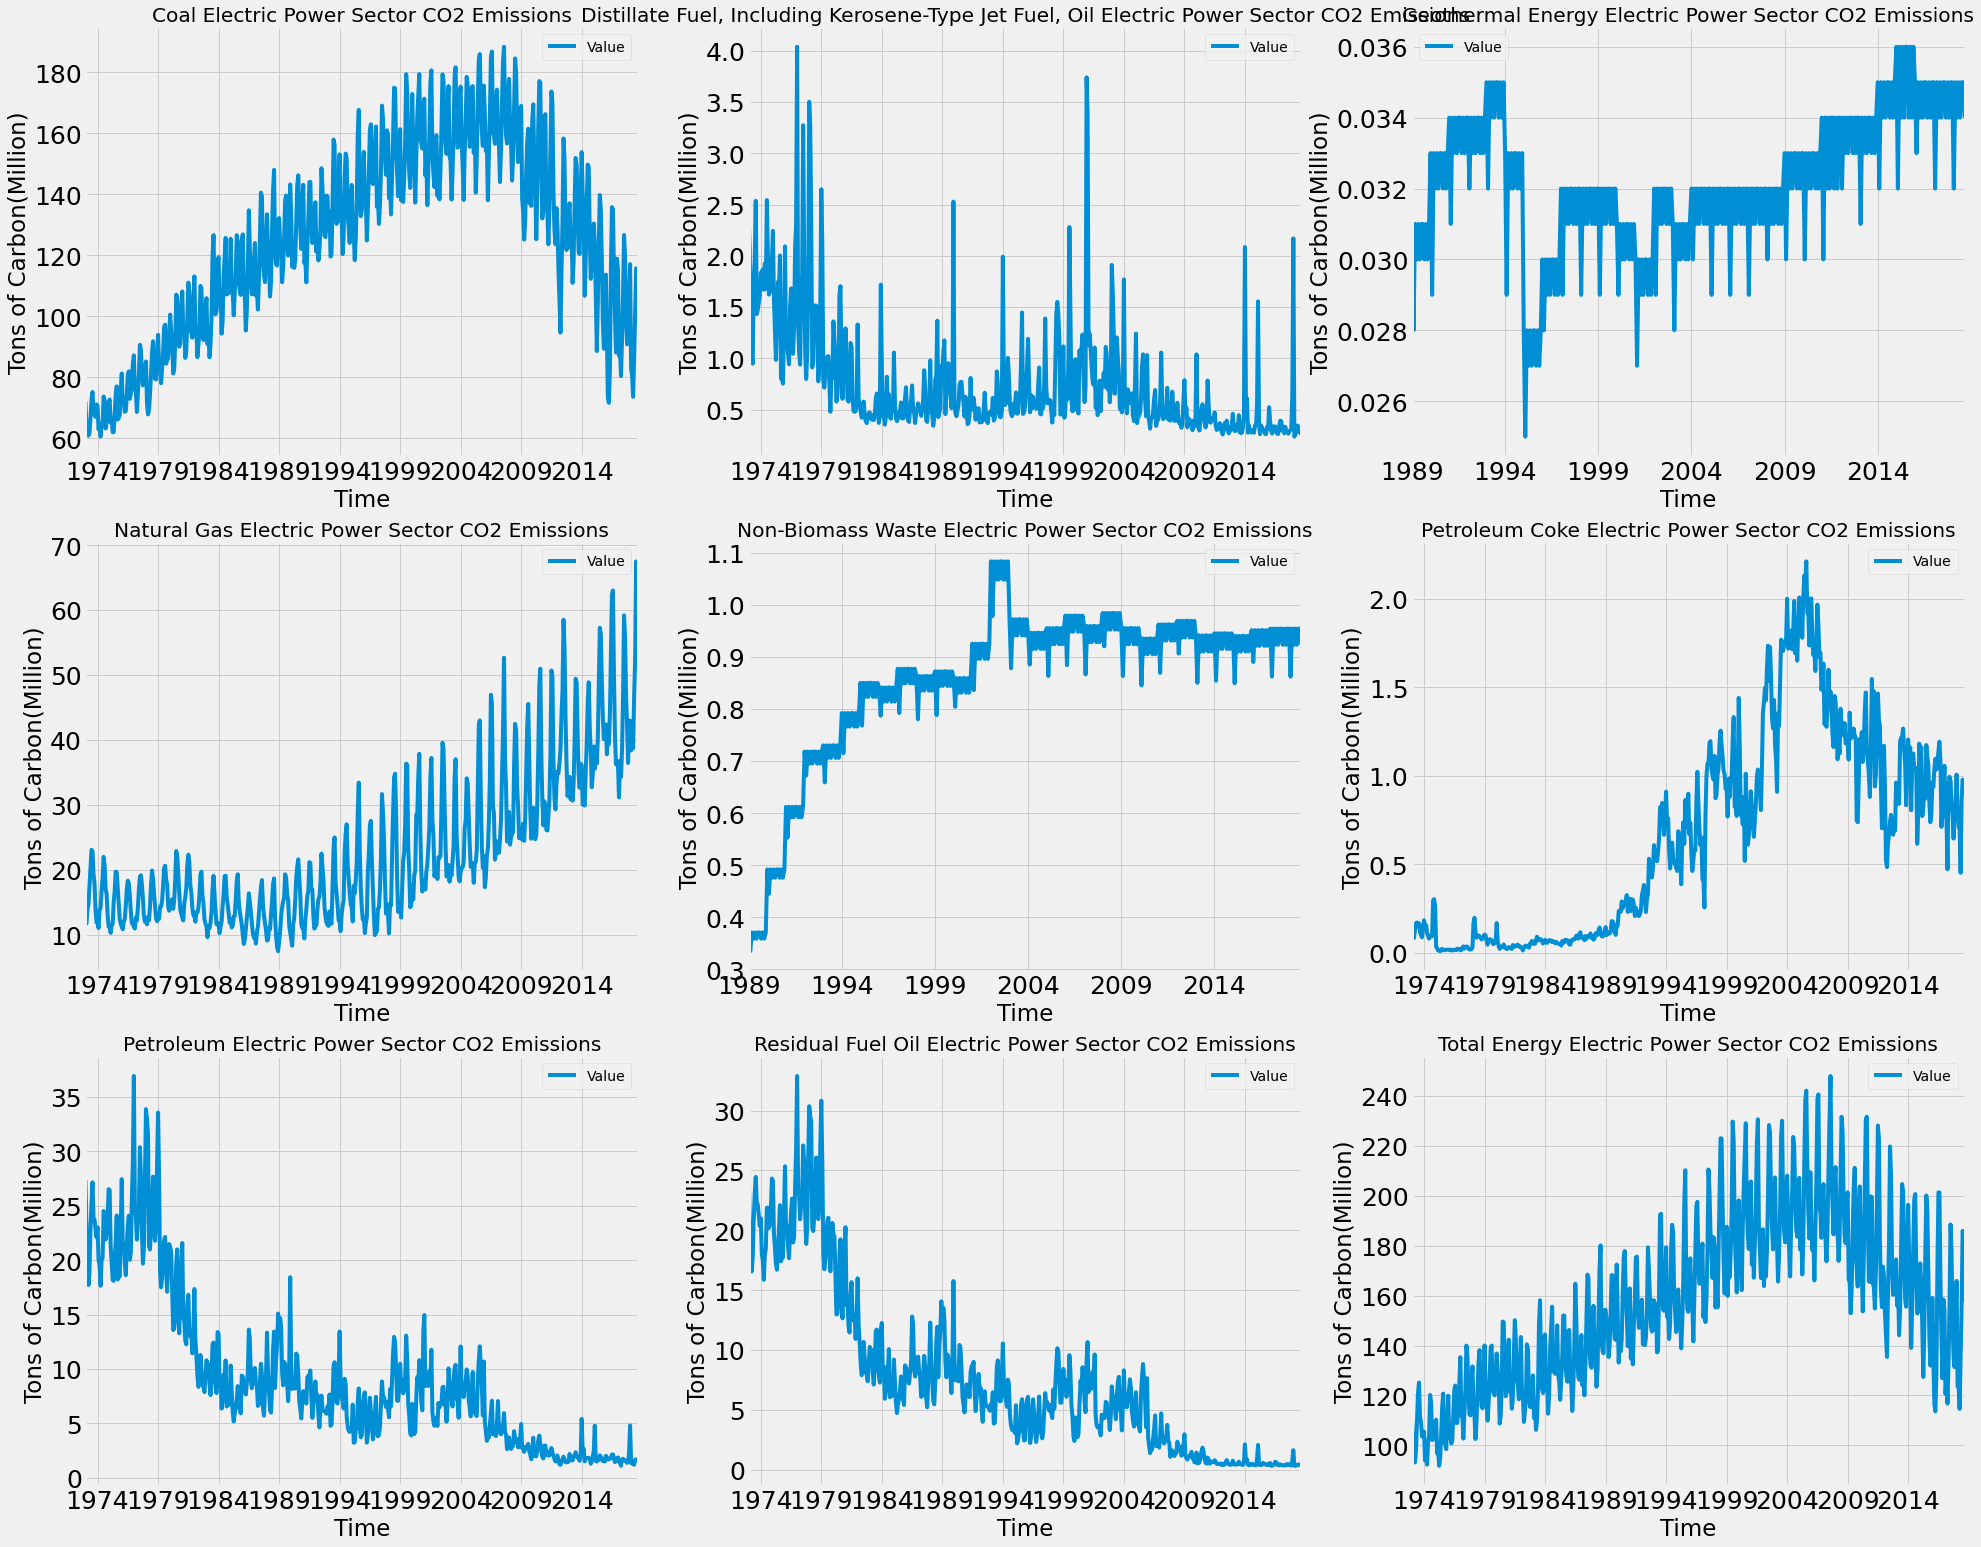

In [18]:
fig, axes = plt.subplots(3,3,figsize = (30,25))
for (desc, group), ax in zip(Energy_sources, axes.flatten()):
    group.plot(y= 'Value', ax = ax, title = desc, fontsize = 25)
    ax.set_xlabel('Time')
    ax.set_ylabel('Tons of Carbon(Million)')
    ax.xaxis.label.set_size(23)
    ax.yaxis.label.set_size(23)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


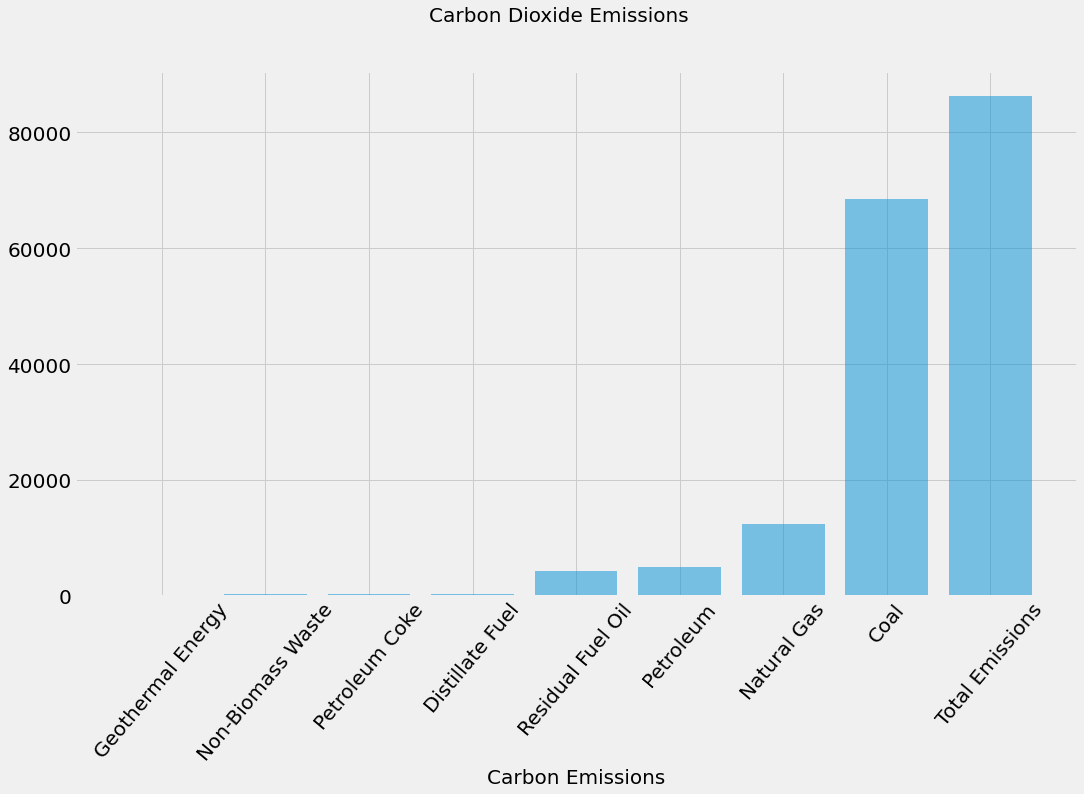

In [19]:
CO2_per_source = ts.groupby('Description')['Value'].sum().sort_values()
cols = ['Geothermal Energy', 'Non-Biomass Waste', 'Petroleum Coke','Distillate Fuel','Residual Fuel Oil', 'Petroleum', 'Natural Gas', 'Coal', 'Total Emissions']
fig = plt.figure(figsize = (16,9))
x_label = cols
x_tick = np.arange(len(cols))
plt.bar(x_tick, CO2_per_source, align = 'center', alpha = 0.5)
fig.suptitle('Carbon Dioxide Emissions', fontsize = 20)
plt.xticks(x_tick, x_label, rotation = 50, fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Carbon Emissions', fontsize = 20)
plt.show()


In [20]:
Emissions = ts.iloc[:,1:]
Emissions = Emissions.groupby(['Description', Emissions.index])['Value'].sum().unstack(level = 0)
mte = Emissions['Natural Gas Electric Power Sector CO2 Emissions']

In [21]:
mte

YYYYMM
1973-01-01    12.175
1973-02-01    11.708
1973-03-01    13.994
1973-04-01    14.627
1973-05-01    17.344
               ...  
2018-05-01    46.682
2018-06-01    52.096
2018-07-01    67.495
2018-08-01    65.629
2018-09-01    57.122
Name: Natural Gas Electric Power Sector CO2 Emissions, Length: 549, dtype: float64

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


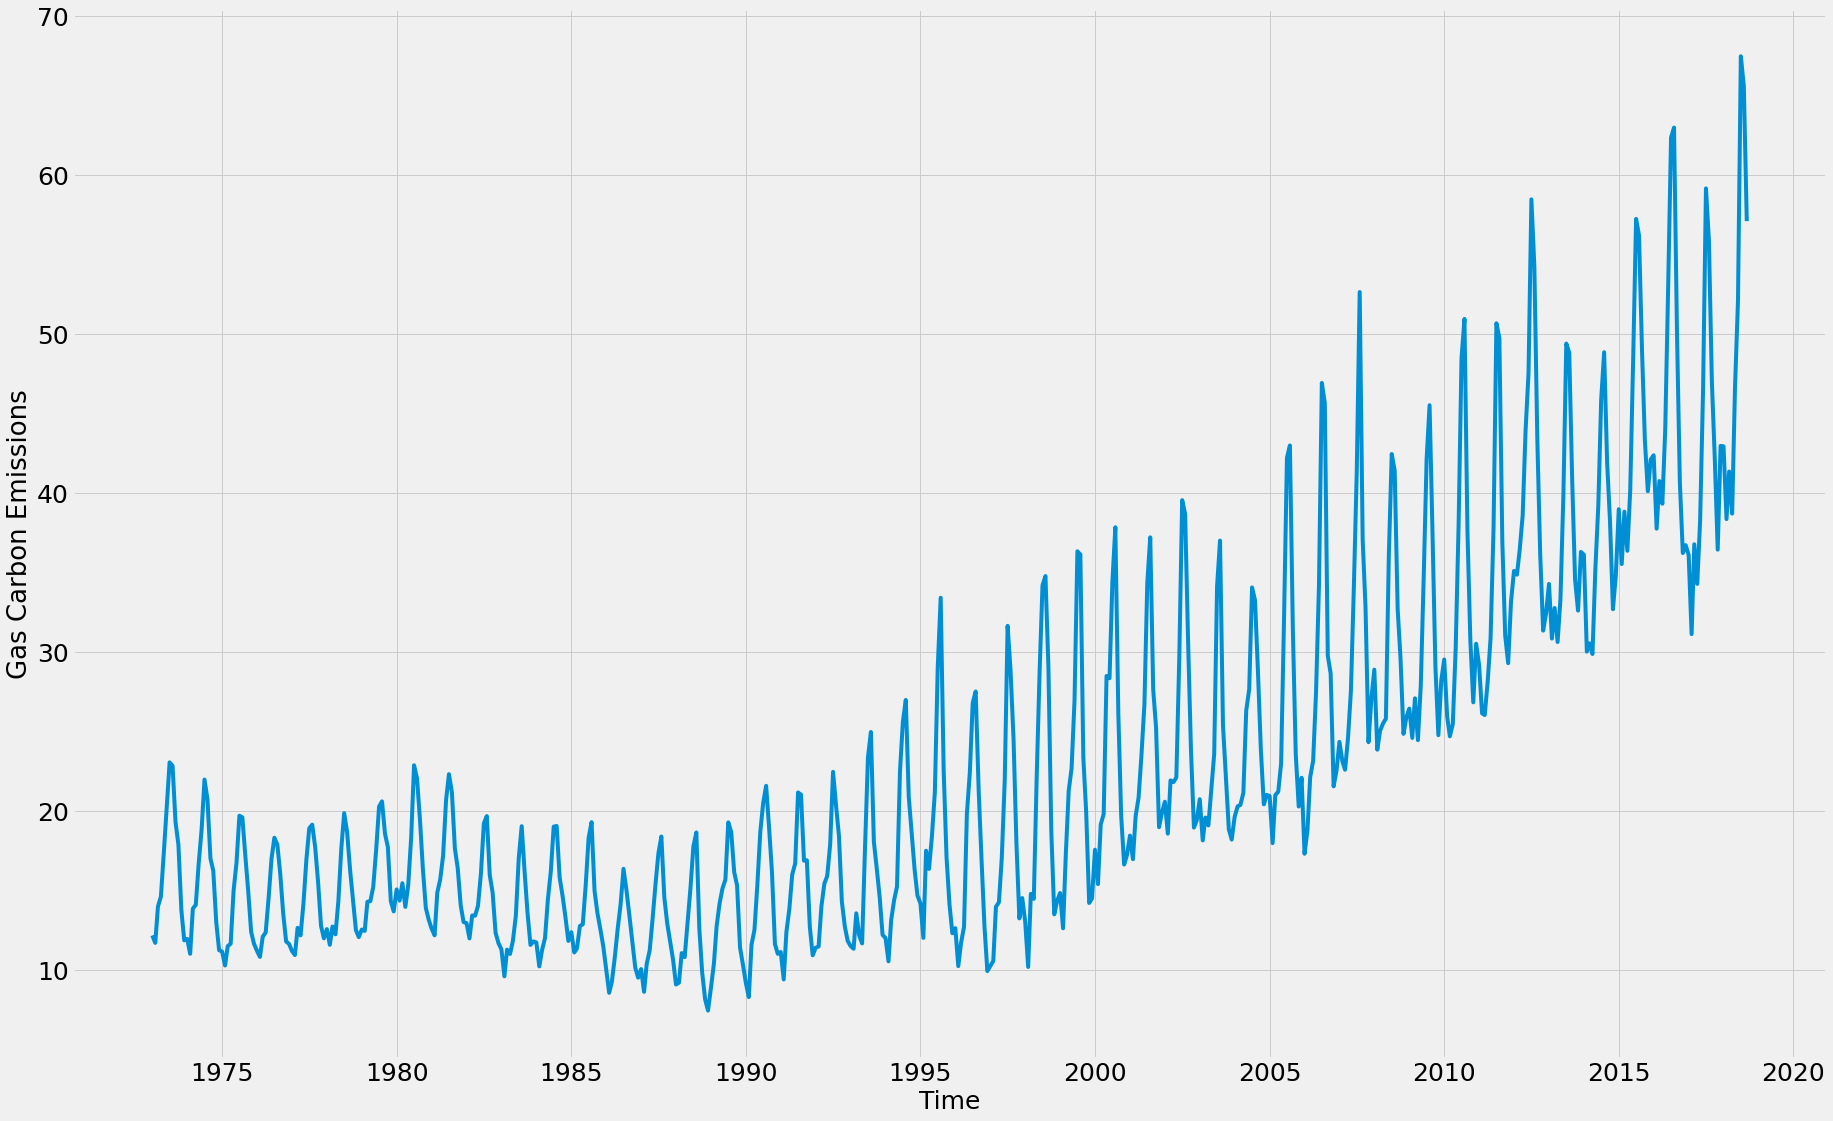

In [30]:
plt.plot(mte)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel('Time', fontsize = 25)
plt.ylabel('Gas Carbon Emissions', fontsize = 26)
plt.show()

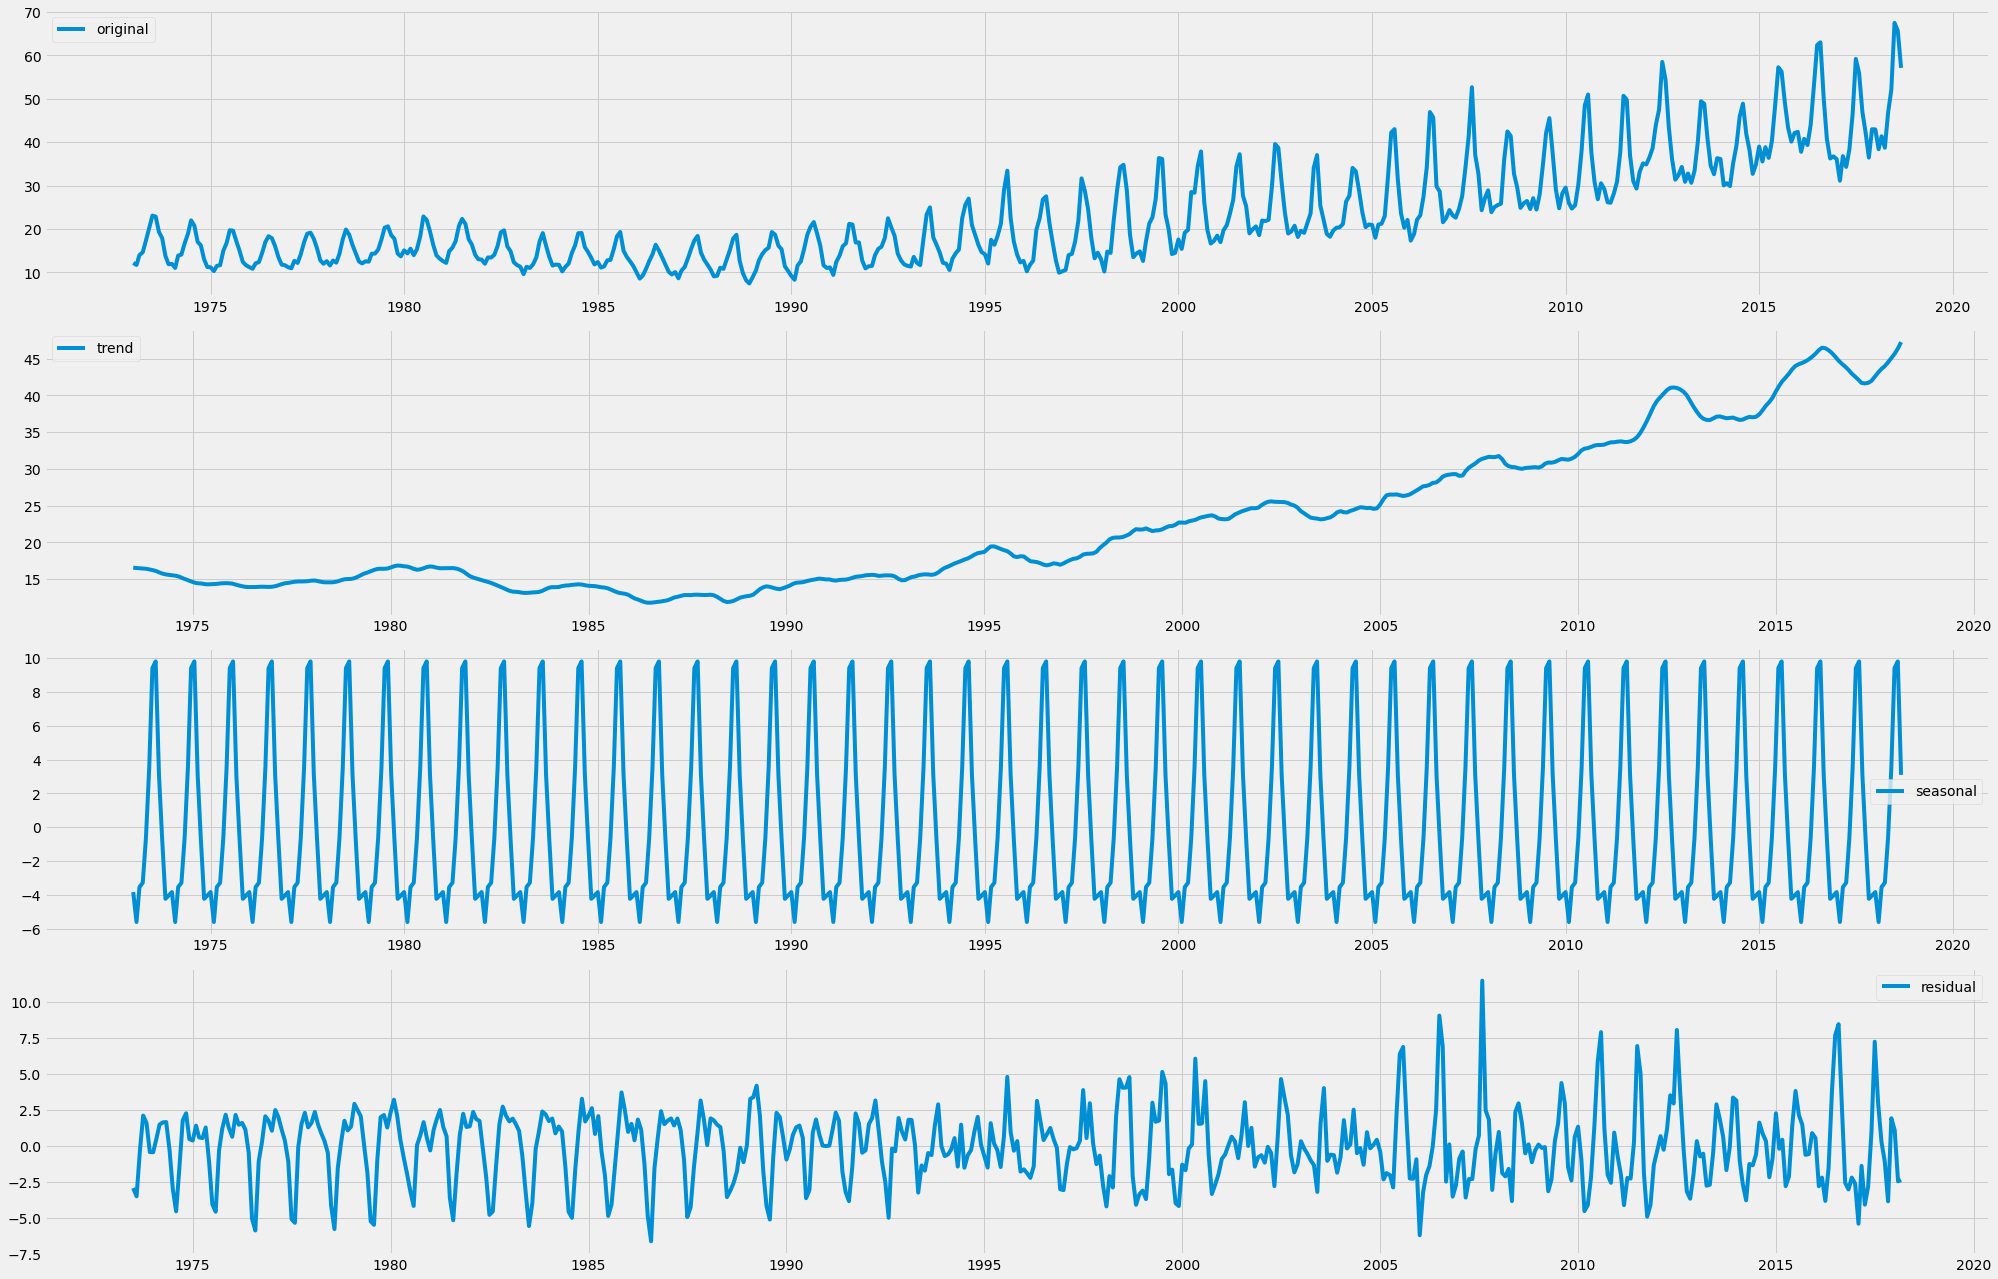

In [31]:
# decomposition of trend, seasonal, residual

decomposition = seasonal_decompose(mte)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(mte, label = 'original')
plt.legend(loc = 'best')

plt.subplot(412)
plt.plot(trend, label = 'trend')
plt.legend(loc = 'best')

plt.subplot(413)
plt.plot(seasonal, label = 'seasonal')
plt.legend(loc = 'best')

plt.subplot(414)
plt.plot(residual, label = 'residual')
plt.legend(loc = 'best')
plt.tight_layout()

The commonly used methods for testing the smoothness of time series

In [35]:
# Plot the moving average and standard deviation

def TestStationaryPlot(ts):
    rol_mean = ts.rolling(window = 12, center = False).mean()
    rol_std = ts.rolling(window = 12, center = False).std()
    
    plt.plot(ts, color = 'blue', label = 'orginal')
    plt.plot(rol_mean, color = 'red', linestyle = '-.', label = 'moving average')
    plt.plot(rol_std, color='black', linestyle = '--', label = 'std')
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25)
    
    plt.xlabel('Time(Year)', fontsize = 25)
    plt.ylabel('Total Emissions', fontsize = 25)
    plt.legend(loc= 'best', fontsize = 18)
    plt.title('Moving average and standard deviation', fontsize = 27)
    plt.show(block = True)

In [38]:
# ADF Test

def TestStationaryAdfuller(ts, cutoff = 0.01):
    ts_test = adfuller(ts, autolag = 'AIC')
    ts_test_output = pd.Series(ts_test[0:4], index = ['Test Statistic','p-value','#Lags Used','Number of Oberservations Used'])
    
    for key, value in ts_test[4].items():
        ts_test_output['Critical Value (%s)' %key] = value
    print(ts_test_output)
    
    if ts_test[1] <= cutoff:
        print('Reject Null hypothesis, the time series is stable')
    else:
        print('Cannot reject Null Hypothesis, the time series is not stable')

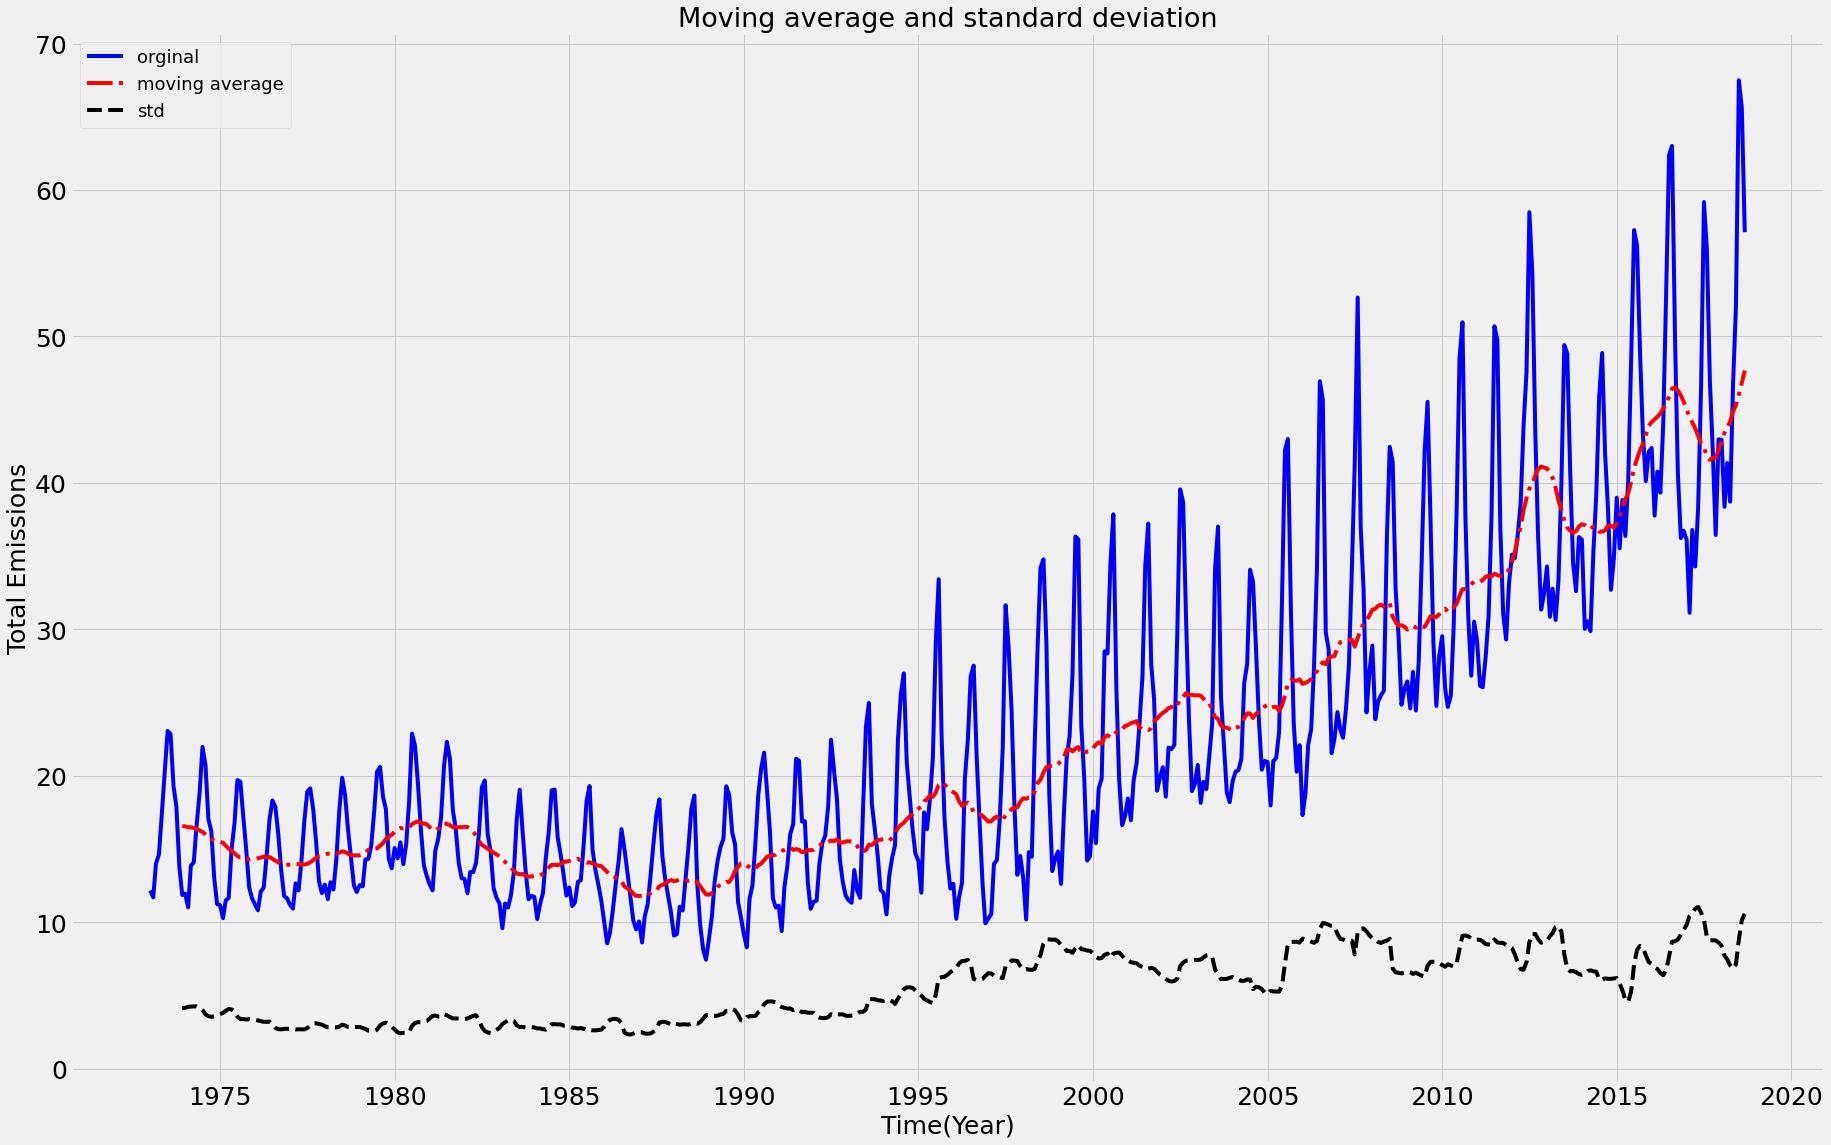

Test Statistic                     1.378581
p-value                            0.997015
#Lags Used                        15.000000
Number of Oberservations Used    533.000000
Critical Value (1%)               -3.442678
Critical Value (5%)               -2.866978
Critical Value (10%)              -2.569666
dtype: float64
Cannot reject Null Hypothesis, the time series is not stable


In [39]:
TestStationaryPlot(mte)
TestStationaryAdfuller(mte)

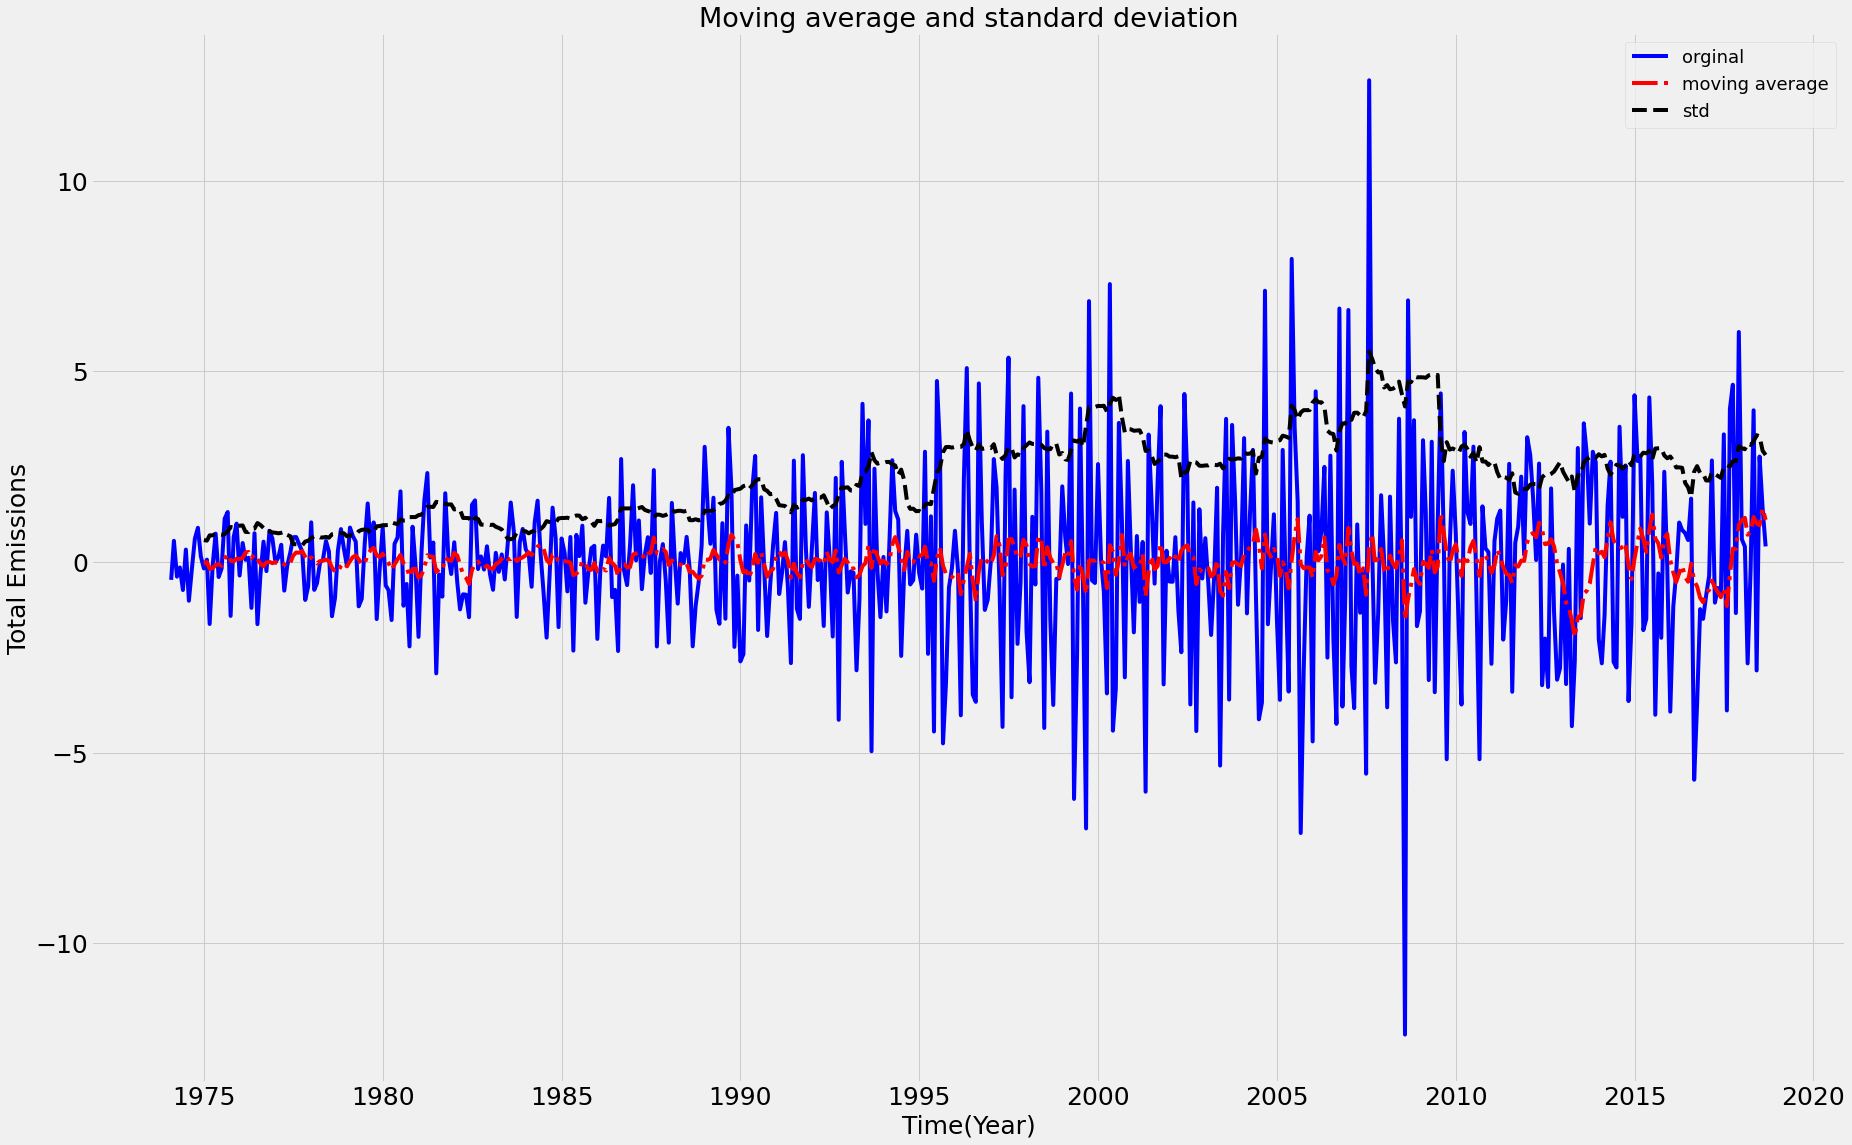

Test Statistic                  -9.575826e+00
p-value                          2.224874e-16
#Lags Used                       1.200000e+01
Number of Oberservations Used    5.230000e+02
Critical Value (1%)             -3.442915e+00
Critical Value (5%)             -2.867082e+00
Critical Value (10%)            -2.569722e+00
dtype: float64
Reject Null hypothesis, the time series is stable


In [40]:
# Remove the trend and seasonal

mte_first_difference = mte - mte.shift(1)
mte_seasonal_first_difference = mte_first_difference - mte_first_difference.shift(12)
TestStationaryPlot(mte_seasonal_first_difference.dropna(inplace=False))
TestStationaryAdfuller(mte_seasonal_first_difference.dropna(inplace=False))

In [44]:
# White Noice Detect

mte_seasonal_first_difference.dropna(inplace = True)
r,q,p = sm.tsa.acf(mte_seasonal_first_difference.values.squeeze(), qstat=True) 
data = np.c_[range(1,28), r[1:], q, p] 
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"]) 
print(table.set_index('lag'))

            AC           Q      Prob(>Q)
lag                                     
1.0  -0.201136   21.805764  3.016925e-06
2.0  -0.218856   47.671370  4.449320e-11
3.0   0.097759   52.841870  1.981345e-11
4.0  -0.018690   53.031208  8.394572e-11
5.0  -0.023829   53.339580  2.864443e-10
6.0  -0.019385   53.544041  9.116055e-10
7.0  -0.062869   55.698654  1.083783e-09
8.0   0.006501   55.721733  3.195609e-09
9.0   0.007028   55.748764  8.766231e-09
10.0  0.159860   69.758879  4.935372e-11
11.0  0.083675   73.604636  2.508586e-11
12.0 -0.458364  189.225480  5.421153e-34
13.0  0.071177  192.018796  5.922290e-34
14.0  0.181420  210.201113  4.497540e-37
15.0 -0.101373  215.889043  1.232152e-37
16.0 -0.043704  216.948257  2.909504e-37
17.0  0.061359  219.040108  4.126243e-37
18.0 -0.016147  219.185261  1.412034e-36
19.0  0.088662  223.569852  6.623315e-37
20.0 -0.007087  223.597923  2.283451e-36
21.0 -0.060992  225.680930  2.991607e-36
22.0 -0.023434  225.989011  8.664881e-36
23.0 -0.043147  

# SARIMA

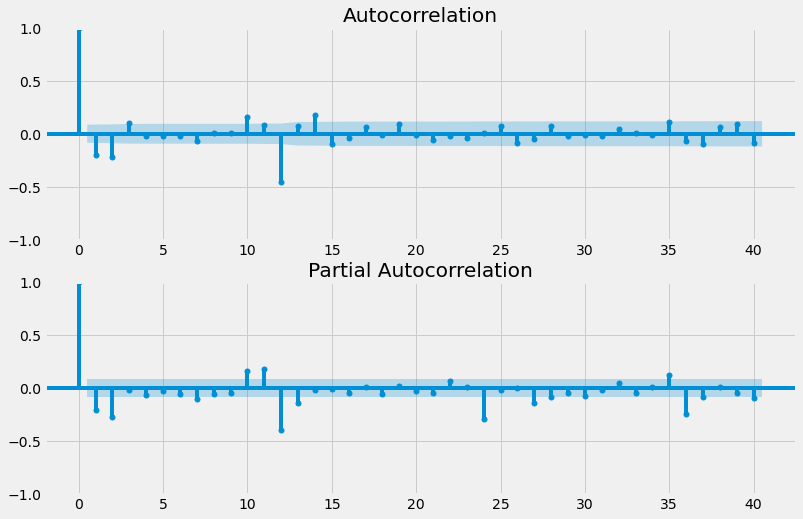

In [45]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(mte_seasonal_first_difference.iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(mte_seasonal_first_difference.iloc[13:], lags=40, ax=ax2)
plt.show()

In [46]:
p = d = q = range(0, 2) 
pdq = list(itertools.product(p, d, q)) 
pdq_x_PDQs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))] 
a=[]
b=[]
c=[]
wf=pd.DataFrame()
for param in pdq:
    for seasonal_param in pdq_x_PDQs:
        try:
            mod = sm.tsa.statespace.SARIMAX(mte,order=param,seasonal_order=seasonal_param,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, seasonal_param, results.aic))
            a.append(param)
            b.append(seasonal_param)
            c.append(results.aic)
        except:
            continue
wf['pdq']=a
wf['pdq_x_PDQs']=b
wf['aic']=c
print(wf[wf['aic']==wf['aic'].min()])

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.65201D+00    |proj g|=  5.50830D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1      3      1     0     0   1.652D-07   4.652D+00
  F =   4.6520143589572331     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:5109.911766135042
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables 

 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:4415.719669214654
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.52025D+00    |proj g|=  7.49171D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      3      5      1     0     0   8.509D-08   2.520D+00
  F =   2.5201083900298773     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:2769.079012252805
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         

 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:2677.712151785999
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.49737D+00    |proj g|=  3.11013D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     18      1     0     0   3.110D-04   2.497D+00
  F =   2.4973704353966464     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:2746.1127380655175
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  2.38185D+00    |proj g|=  4.47408D-01

At iterate   10    f=  2.38109D+00    |proj g|=  2.52704D-01

At iterate   15    f=  2.38052D+00    |proj g|=  5.18477D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     21      1     0     0   8.243D-06   2.381D+00
  F =   2.3805197235831268     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:2619.810656494273
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0 

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.43661D+00    |proj g|=  6.24307D-02

At iterate    5    f=  2.43361D+00    |proj g|=  8.73332D-03

At iterate   10    f=  2.43354D+00    |proj g|=  3.20721D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     12      1     0     0   3.207D-06   2.434D+00
  F =   2.4335431079168961     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:2678.0303324927518
RUNNING THE L-BF

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.27083D+00    |proj g|=  5.59715D-02

At iterate   10    f=  4.03085D+00    |proj g|=  6.23795D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     13     22      1     0     0   5.058D-06   4.031D+00
  F =   4.0307169103819867     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:4429.727167599422
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.47534D+00    |proj g|=  6.06285D-01

At iterate    5 

 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:2393.5898427821294
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.43146D+00    |proj g|=  6.57346D-01

At iterate    5    f=  2.93111D+00    |proj g|=  5.19050D+00

At iterate   10    f=  2.26908D+00    |proj g|=  1.95216D-02

At iterate   15    f=  2.26841D+00    |proj g|=  4.58335D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     30      1     0     0   4.583D-05   2.268D+00
  F =   2.2684103297956488     

CONVERGENCE: RE

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.61568D+00    |proj g|=  2.01868D+00

At iterate   10    f=  2.64046D+00    |proj g|=  9.81707D-01

At iterate   15    f=  2.19853D+00    |proj g|=  5.81641D-01

At iterate   20    f=  2.13761D+00    |proj g|=  2.33411D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     47      1     0     0   7.028D-06   2.138D+00
  F =   2.1376050614499418     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:2355.090357472036
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0  

 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:2409.488539958192
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.20548D+00    |proj g|=  1.01763D-01

At iterate    5    f=  2.17410D+00    |proj g|=  8.00650D-03

At iterate   10    f=  2.17367D+00    |proj g|=  1.48337D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     13      1     0     0   1.541D-07   2.174D+00
  F =   2.1736695748702131     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(1

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:2457.635628275578
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.00770D+00    |proj g|=  1.10576D-01

At iterate    5    f=  1.99525D+00    |proj g|=  9.16135D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      6      9      1     0     0   7.533D-06   1.995D+00
  F =   1.9952470046378303     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:2194.781211092338
RUNNING THE L-BFGS-B CODE


 This problem is unconstrained.
 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     21      1     0     0   1.564D-05   2.209D+00
  F =   2.2093082396455603     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:2429.8204471308254
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.05525D+00    |proj g|=  5.16630D-01

At iterate    5    f=  2.03260D+00    |proj g|=  4.72216D-01

At iterate   10    f=  2.02714D+00    |proj g|=  5.90110D-02

           * * 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.99874D+00    |proj g|=  6.45196D-03

At iterate   10    f=  1.99525D+00    |proj g|=  2.40182D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     27      1     0     0   1.638D-04   1.995D+00
  F =   1.9952468934543268     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:2196.7810890128508
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.76321D+00    |proj g|=  1.12026D-02

At iterate    5

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  2.50321D+00    |proj g|=  2.11285D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     11      1     0     0   7.322D-06   2.503D+00
  F =   2.5028968616970038     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:2754.18075414331
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.19902D+00    |proj g|=  6.10955D-02

At iterate    5    f=  2.19606D+00    |proj g|=  1.02114D-06

           * * *


 This problem is unconstrained.



At iterate    5    f=  1.96697D+00    |proj g|=  3.62857D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     10      1     0     0   9.860D-06   1.967D+00
  F =   1.9669701622566298     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:2165.7332381577794
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.44611D+00    |proj g|=  1.79308D-01

At iterate    5    f=  2.18856D+00    |proj g|=  1.37345D-01

At iterate   10

 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:2404.1820246733537
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.39070D+00    |proj g|=  1.66414D-01

At iterate    5    f=  2.13571D+00    |proj g|=  2.50753D-01

At iterate   10    f=  1.99803D+00    |proj g|=  9.78631D-02

At iterate   15    f=  1.99723D+00    |proj g|=  9.08164D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     22      1     0     0   5.117D-06   1.997D+00
  F =   1.9972281174281057     

CONVERGENCE: NO

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.01509D+00    |proj g|=  1.22063D-01

At iterate    5    f=  1.96943D+00    |proj g|=  5.91124D-03

At iterate   10    f=  1.96941D+00    |proj g|=  7.09228D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     13      1     0     0   7.092D-06   1.969D+00
  F =   1.9694056102185096     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:2170.4073600199235
RUNNING THE L-BF

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  2.57916D+00    |proj g|=  8.71673D-02

At iterate   10    f=  2.53601D+00    |proj g|=  5.11203D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     25      1     0     0   1.374D-05   2.536D+00
  F =   2.5360121152509865     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 0)x(0, 0, 1, 12) - AIC:2790.541302545583
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.16949D+00    |proj g|=  9.86367D-06

           * * *

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.02857D+00    |proj g|=  1.68032D-01

At iterate    5    f=  1.97180D+00    |proj g|=  7.32715D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     15      1     0     0   3.284D-08   1.972D+00
  F =   1.9717788487245682     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 0)x(0, 1, 1, 12) - AIC:2171.013175899576
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  2.21924D+00    |proj g|=  1.00873D+00

At iterate   10    f=  2.05161D+00    |proj g|=  6.76394D-01

At iterate   15    f=  1.98288D+00    |proj g|=  1.19138D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     29      1     0     0   3.482D-05   1.983D+00
  F =   1.9828198840388096     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 0)x(1, 0, 1, 12) - AIC:2185.136232674613
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.97511D+00    |proj g|=  7.38780D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     11      1     0     0   4.588D-06   1.974D+00
  F =   1.9742409448201881     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 0)x(1, 1, 1, 12) - AIC:2175.7165574125665
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.76669D+00    |proj g|=  8.79266D-02

At iterate    5    f=  2.76392D+00    |proj g|=  1.84008D-03


 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     10      1     0     0   2.876D-06   2.764D+00
  F =   2.7639203901567764     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 1)x(0, 0, 0, 12) - AIC:3040.7845883921404
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.61048D+00    |proj g|=  3.93165D-01

At iterate    5    f=  2.52758D+00    |proj g|=  7.36172D-02

At iterate   10    f=  2.50306D+00    |proj g|=  4.50437D-03

           * * 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.95680D+00    |proj g|=  2.32301D-02

At iterate   10    f=  1.95625D+00    |proj g|=  7.31735D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     19      1     0     0   7.773D-07   1.956D+00
  F =   1.9562518952672996     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 1)x(0, 1, 1, 12) - AIC:2155.964581003495


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.46821D+00    |proj g|=  2.63679D-01

At iterate    5    f=  2.17686D+00    |proj g|=  2.38354D-01

At iterate   10    f=  2.16449D+00    |proj g|=  1.10719D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     20      1     0     0   4.024D-05   2.164D+00
  F =   2.1644083518395076     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 1)x(1, 0, 0, 12) - AIC:2384.5203703197794
RUNNING THE L-BF

 This problem is unconstrained.



At iterate    5    f=  2.01838D+00    |proj g|=  1.16140D-02

At iterate   10    f=  2.01836D+00    |proj g|=  5.93436D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     12      1     0     0   5.934D-07   2.018D+00
  F =   2.0183560913578615     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 1)x(1, 1, 0, 12) - AIC:2224.154988310932
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.02556D+00    |proj g|=  1.50476D-01


 This problem is unconstrained.



At iterate    5    f=  1.95990D+00    |proj g|=  3.54331D-02

At iterate   10    f=  1.95840D+00    |proj g|=  2.49209D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     12     14      1     0     0   2.504D-06   1.958D+00
  F =   1.9583988856389414     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 1)x(1, 1, 1, 12) - AIC:2160.3219764315577
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.77345D+00    |proj g|=  5.69842D-06

           * * 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(1, 1, 0)x(0, 1, 0, 12) - AIC:2437.556661572913
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.01416D+00    |proj g|=  1.31483D-01

At iterate    5    f=  1.97770D+00    |proj g|=  1.33940D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6     10      1     0     0   2.724D-07   1.978D+00
  F =   1.9776999615774753     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


ARIMA(1, 1, 0)x(0, 1, 1, 12) - AIC:2177.514557812068
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.44025D+00    |proj g|=  1.79586D-01

At iterate    5    f=  2.20061D+00    |proj g|=  1.24004D-01

At iterate   10    f=  2.19282D+00    |proj g|=  7.14615D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     15      1     0     0   4.036D-06   2.193D+00
  F =   2.1928155505411384     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 0)x(1

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  2.12099D+00    |proj g|=  4.84238D-01

At iterate   10    f=  2.02314D+00    |proj g|=  9.99214D-01

At iterate   15    f=  2.00791D+00    |proj g|=  1.42213D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     25      1     0     0   8.649D-05   2.008D+00
  F =   2.0079024923896882     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:2212.6769366438775


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.06802D+00    |proj g|=  8.38516D-02

At iterate    5    f=  2.05589D+00    |proj g|=  2.37872D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5      8      1     0     0   2.379D-05   2.056D+00
  F =   2.0558934469120391     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 0)x(1, 1, 0, 12) - AIC:2263.371004709419
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  2.50377D+00    |proj g|=  2.33595D-02

At iterate   10    f=  2.50209D+00    |proj g|=  1.71128D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     17      1     0     0   3.631D-06   2.502D+00
  F =   2.5020869419413141     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:2755.2914622515627
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.18784D+00    |proj g|=  8.25445D-02

At iterate    5

 This problem is unconstrained.



At iterate   10    f=  2.16188D+00    |proj g|=  2.52135D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     26      1     0     0   3.930D-06   2.162D+00
  F =   2.1618816415666156     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 1)x(0, 1, 0, 12) - AIC:2379.746042440144
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.99570D+00    |proj g|=  1.35705D-01


 This problem is unconstrained.



At iterate    5    f=  1.93913D+00    |proj g|=  6.53246D-02

At iterate   10    f=  1.93261D+00    |proj g|=  4.35834D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     25      1     0     0   8.078D-05   1.933D+00
  F =   1.9326138278340990     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 1)x(0, 1, 1, 12) - AIC:2130.0099829618407
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.44217D+00    |proj g|=  1.85114D-01

At iterate    5

 This problem is unconstrained.



At iterate   15    f=  2.14371D+00    |proj g|=  8.08093D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     31      1     1     0   5.308D-05   2.144D+00
  F =   2.1436932605711503     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:2361.775200107123
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.38643D+00    |proj g|=  1.66828D-01


 This problem is unconstrained.



At iterate    5    f=  2.03801D+00    |proj g|=  5.01860D-01

At iterate   10    f=  1.99740D+00    |proj g|=  3.98763D-02

At iterate   15    f=  1.98198D+00    |proj g|=  7.01243D-01

At iterate   20    f=  1.96672D+00    |proj g|=  3.16166D-01

At iterate   25    f=  1.96391D+00    |proj g|=  4.42150D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     53      1     0     0   1.933D-04   1.964D+00
  F =   1.9639126746095956     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:2166.376116721336
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisi

 This problem is unconstrained.



At iterate    5    f=  2.02202D+00    |proj g|=  2.45122D-01
  ys=-5.269E-02  -gs= 6.449E-03 BFGS update SKIPPED

At iterate   10    f=  2.01812D+00    |proj g|=  7.99399D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     25      1     1     0   2.430D-05   2.018D+00
  F =   2.0181115884065939     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 1)x(1, 1, 0, 12) - AIC:2223.88652407044
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.00

 This problem is unconstrained.



At iterate    5    f=  1.95526D+00    |proj g|=  1.23627D-01

At iterate   10    f=  1.93645D+00    |proj g|=  1.59118D-01

At iterate   15    f=  1.93260D+00    |proj g|=  3.05372D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     35      1     0     0   6.230D-04   1.933D+00
  F =   1.9325963810498112     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC:2131.9908263926927
          pdq     pdq_x_PDQs          aic
59  (1, 1, 1)  (0, 1, 1, 12)  2130.009983


In [47]:
mod = sm.tsa.statespace.SARIMAX(mte, 
                                order=(1,1,1), 
                                seasonal_order=(0,1,1,12),   
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.99570D+00    |proj g|=  1.35705D-01


 This problem is unconstrained.



At iterate    5    f=  1.93913D+00    |proj g|=  6.53246D-02

At iterate   10    f=  1.93261D+00    |proj g|=  4.35834D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     25      1     0     0   8.078D-05   1.933D+00
  F =   1.9326138278340990     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                                              SARIMAX Results                                              
Dep. Variable:     Natural Gas Electric Power Sector CO2 Emissions   No. Observations:                  549
Model:                              SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood

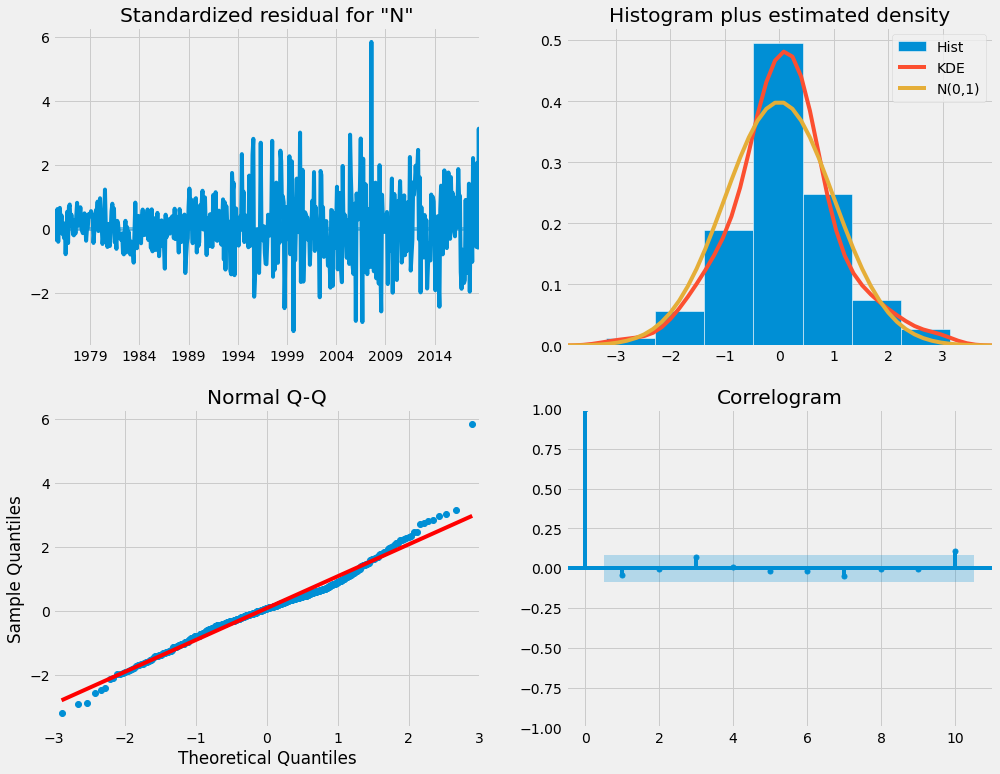

            AC          Q  Prob(>Q)
lag                                
1.0  -0.063038   2.193586  0.138586
2.0   0.016338   2.341207  0.310180
3.0   0.049277   3.686535  0.297363
4.0   0.021702   3.947956  0.413095
5.0  -0.010276   4.006672  0.548456
6.0  -0.023261   4.308094  0.635060
7.0  -0.045981   5.488099  0.600620
8.0  -0.030068   5.993620  0.647947
9.0   0.007582   6.025820  0.737331
10.0  0.068122   8.630196  0.567521
11.0  0.029710   9.126502  0.610217
12.0 -0.057476  10.987406  0.529998
13.0  0.031234  11.537968  0.565844
14.0  0.072160  14.482139  0.414443
15.0 -0.140787  25.710213  0.041181
16.0 -0.054620  27.403405  0.037211
17.0 -0.016305  27.554578  0.050420
18.0 -0.023371  27.865736  0.064128
19.0 -0.006514  27.889951  0.085570
20.0 -0.033437  28.529297  0.097450
21.0 -0.087741  32.939909  0.046888
22.0 -0.002907  32.944758  0.062655
23.0 -0.002428  32.948149  0.081974
24.0 -0.048539  34.305692  0.079381
25.0  0.044423  35.444911  0.080455
26.0 -0.058790  37.444016  0

In [49]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

r,q,p = sm.tsa.acf(results.resid.values.squeeze(), qstat=True) 
data = np.c_[range(1,28), r[1:], q, p] 
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"]) 
print(table.set_index('lag'))

In [50]:
pred = results.get_prediction(start = 492, dynamic=False)
pred_ci = pred.conf_int()
mte_forecast = pred.predicted_mean
mte_truth = mte['2014-01-1':]
mte_pred_concat = pd.concat([mte_truth, mte_forecast,pred_ci],axis=1)
mte_pred_concat.columns = ['Original Value','Predicted Value','Lower Bound','Upper Bound']
mte_pred_concat.head(15)

,Original Value,Predicted Value,Lower Bound,Upper Bound
2014-01-01,36.133,36.734350,33.133686,40.335014
2014-02-01,30.036,33.545787,29.945123,37.146451
2014-03-01,30.554,32.022322,28.421658,35.622986
2014-04-01,29.885,31.697628,28.096964,35.298292
2014-05-01,35.211,34.470572,30.869908,38.071236
2014-06-01,39.228,42.112464,38.511800,45.713128
2014-07-01,45.901,50.358659,46.757995,53.959323
2014-08-01,48.871,47.745302,44.144638,51.345966
2014-09-01,41.961,39.469806,35.869142,43.070470
2014-10-01,38.286,35.943296,32.342632,39.543960


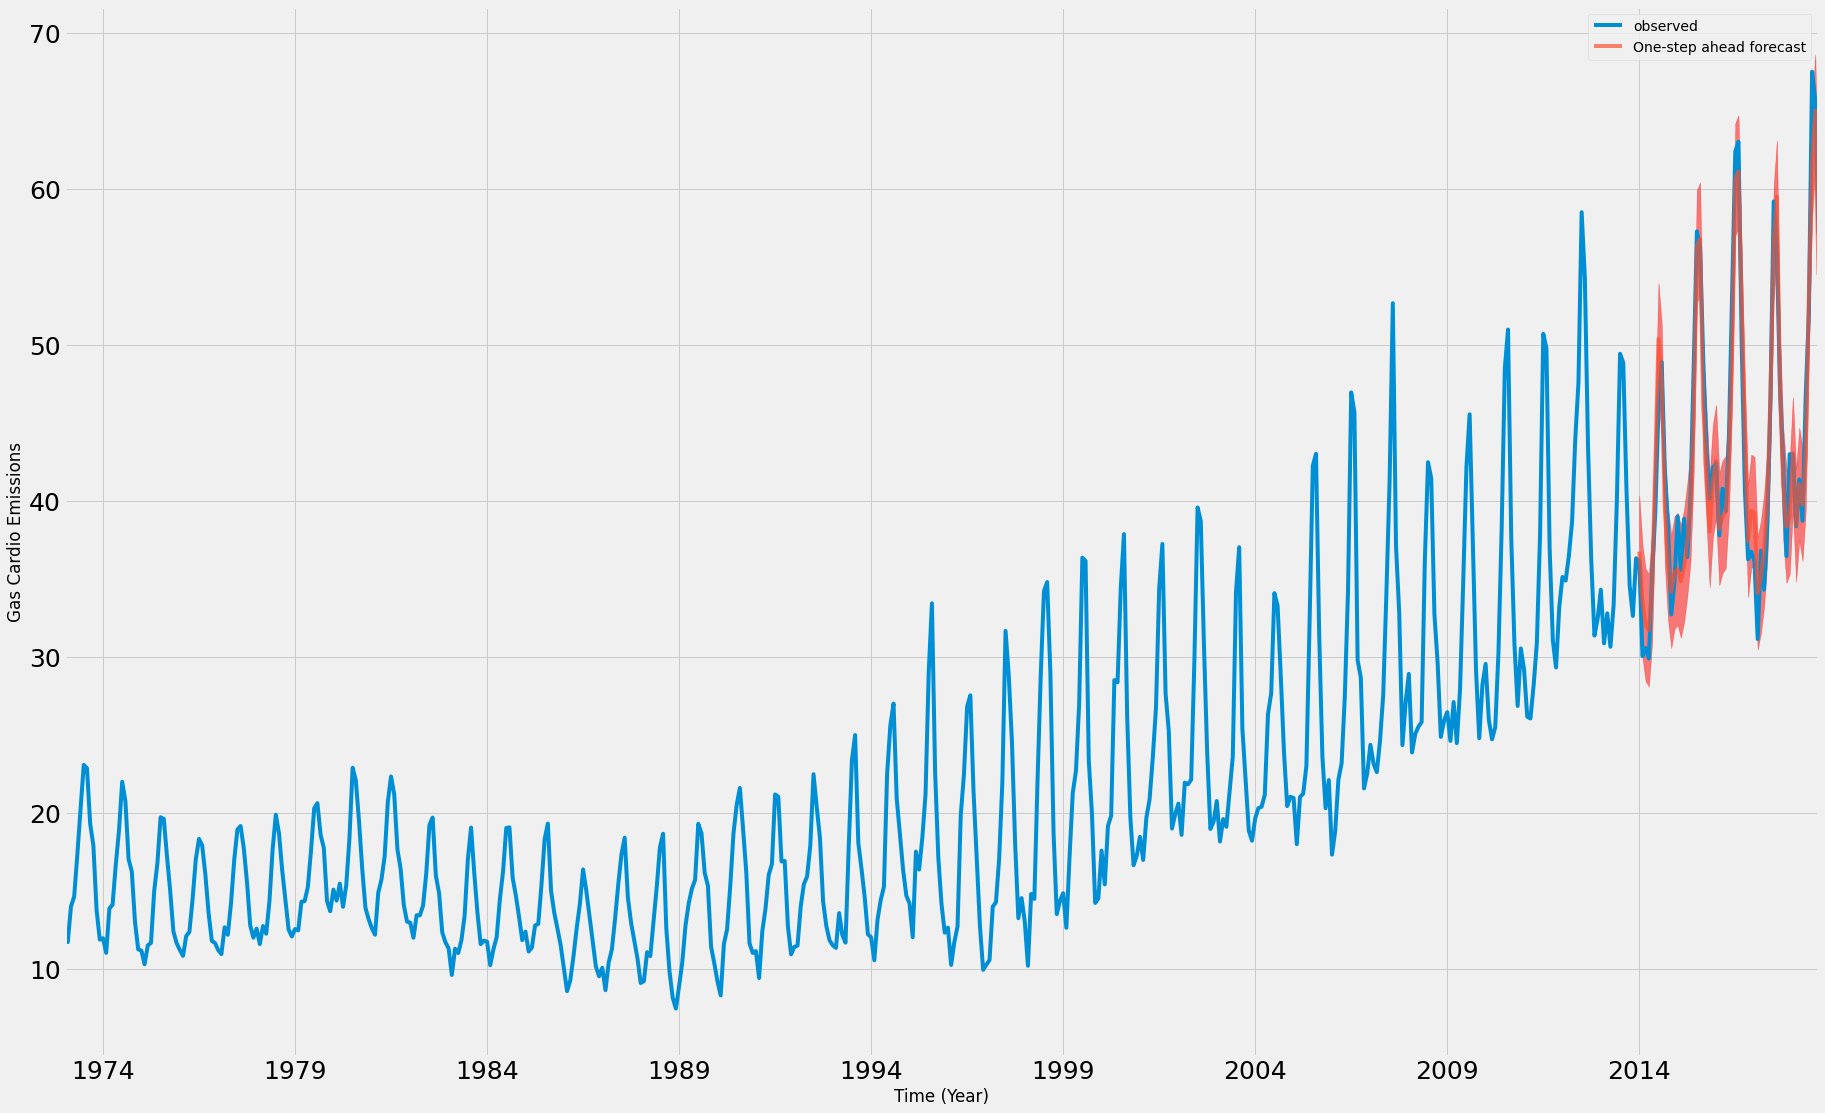

In [51]:
ax = mte['1973':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead forecast', alpha=.7)
ax.fill_between(pred_ci.index,pred_ci.iloc[:,0],pred_ci.iloc[:,1], color='r', alpha=.5)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
ax.set_xlabel('Time (Year)')
ax.set_ylabel('Gas Cardio Emissions')
plt.legend()
plt.show()

In [53]:
mse = ((mte_forecast - mte_truth) ** 2).mean()
print('MSE is: {}'.format(round(mse, 2)))
print('RMSE is: {:.4f}'.format(np.sqrt(sum((mte_forecast-mte_truth)**2)/len(mte_forecast))))

MSE is: 5.08
RMSE is: 2.2548


In [54]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2014-01-1'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()
mte_forecast = pred_dynamic.predicted_mean
mte_orginal = mte['2014-01-1':]
mte_pred_concat = pd.concat([mte_orginal, mte_forecast,pred_ci],axis=1)
mte_pred_concat.columns = ['Original Value','Predicted Value','Lower Bound','Upper Bound']
mte_pred_concat.head(15)

,Original Value,Predicted Value,Lower Bound,Upper Bound
2014-01-01,36.133,36.734350,33.133686,40.335014
2014-02-01,30.036,33.986311,29.945123,37.146451
2014-03-01,30.554,34.921087,28.421658,35.622986
2014-04-01,29.885,34.933939,28.096964,35.298292
2014-05-01,35.211,38.241043,30.869908,38.071236
2014-06-01,39.228,44.443166,38.511800,45.713128
2014-07-01,45.901,54.311530,46.757995,53.959323
2014-08-01,48.871,54.077659,44.144638,51.345966
2014-09-01,41.961,43.518844,35.869142,43.070470
2014-10-01,38.286,37.354850,32.342632,39.543960


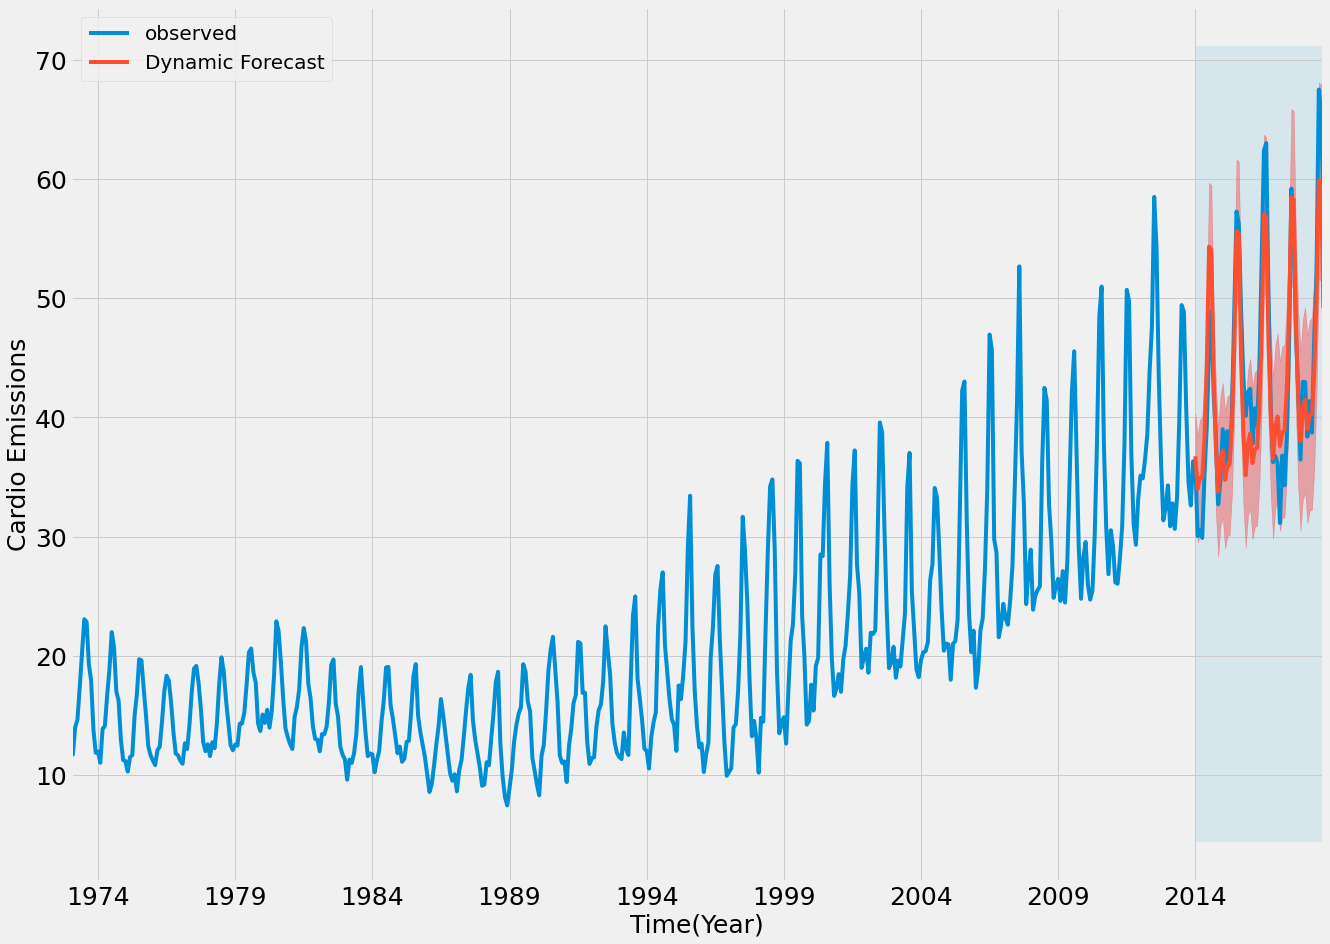

In [55]:
ax = mte['1973':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)
ax.fill_between(pred_dynamic_ci.index,pred_dynamic_ci.iloc[:, 0],pred_dynamic_ci.iloc[:, 1],color='r',alpha=.3)
ax.fill_betweenx(ax.get_ylim(),pd.to_datetime('2014-01-31'),mte.index[-1],alpha=.1, zorder=-1)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
ax.set_xlabel('Time(Year)',fontsize=25)
ax.set_ylabel('Cardio Emissions',fontsize=25)
plt.legend(loc = 'upper left',fontsize=20)
plt.show()

In [56]:
mse = ((mte_forecast - mte_orginal) ** 2).mean()
print('MSE is {}'.format(round(mse, 2)))
print('RMSE is : {:.4f}'.format(np.sqrt(sum((mte_forecast-mte_orginal)**2)/len(mte_forecast))))

MSE is 13.46
RMSE is : 3.6684


In [57]:

forecast = results.get_forecast(steps= 120)

forecast_ci = forecast.conf_int()
mte_forecast = forecast.predicted_mean
mte_pred_concat = pd.concat([mte_forecast,forecast_ci],axis=1)
mte_pred_concat.columns = ['Predicted Value','Lower Bound','Upper Bound']
mte_pred_concat.head()

,Predicted Value,Lower Bound,Upper Bound
2018-10-01,49.329646,45.728982,52.930310
2018-11-01,43.600068,39.136636,48.063501
2018-12-01,45.894252,41.018718,50.769787
2019-01-01,45.832897,40.735536,50.930257
2019-02-01,41.201711,35.975275,46.428148


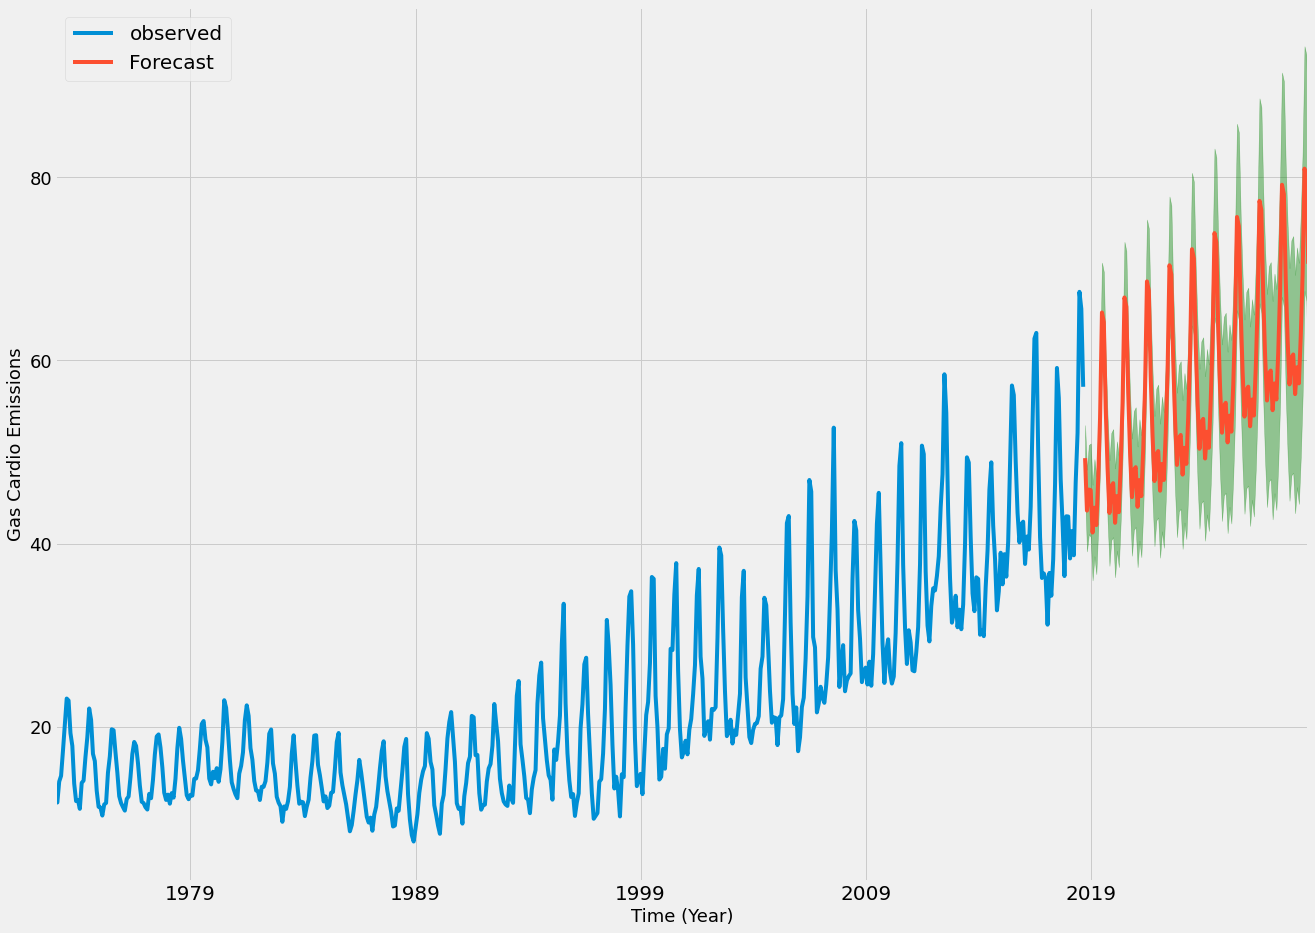

In [58]:
ax = mte.plot(label='observed', figsize=(20, 15))
forecast.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1], color='g', alpha=.4)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 18)
ax.set_xlabel('Time (Year)',fontsize=18)
ax.set_ylabel('Gas Cardio Emissions',fontsize=18)
plt.legend(loc = 'upper left',fontsize=20)
plt.show()